# Influence of the initial population on the result of the experiment

The initially generated population is certainly important for the course of the experiment. Since it is created randomly we need to asess how much of an influence it will have on the end result.

In this experiment, three initial populations were created and then evolved using different post initialization seeds.

In [1]:
from wann_genetic.tools import ExperimentSeries
from util import accuracy_swarmplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [3]:
data_dir = "../data/04_iris_init_pop"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats()
series.var_names()

odict_keys(['initial_edge_prob', 'post_init_seed', 'population_seed'])

In [4]:
df['initial gene type'] = df.aggregate(lambda row: f"{row['initial_edge_prob/_name']}", axis=1)

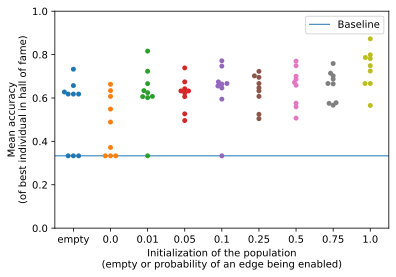

In [5]:
accuracy_swarmplot(data=df, x="initial gene type", xlabel="Initialization of the population\n(empty or probability of an edge being enabled)")

## Populations that have been initialized entirely disabled edges

In [6]:
selection = (df['initial_edge_prob/initial_genes'] != 'empty') & (df['initial_edge_prob/initial_enabled_edge_prob'] == 0)
patrial_df = df[selection]

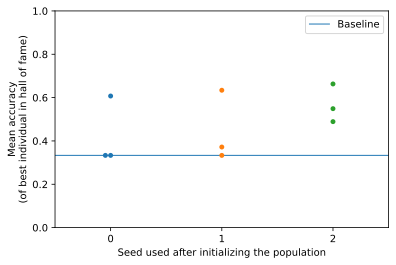

In [7]:
accuracy_swarmplot(data=patrial_df, x='post_init_seed', xlabel='Seed used after initializing the population')

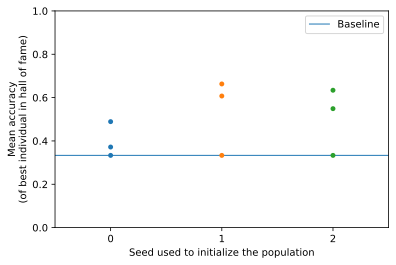

In [8]:
accuracy_swarmplot(data=patrial_df, x='population_seed', xlabel='Seed used to initialize the population')

## Populations that have been initialized ~50% enabled edges

In [9]:
selection = (df['initial_edge_prob/initial_genes'] != 'empty') & (df['initial_edge_prob/initial_enabled_edge_prob'] == 0.5)
patrial_df = df[selection]

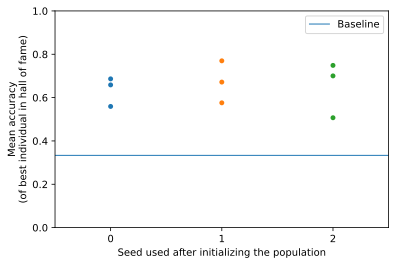

In [10]:
accuracy_swarmplot(data=patrial_df, x='post_init_seed', xlabel='Seed used after initializing the population')

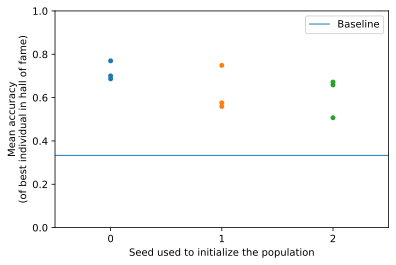

In [11]:
accuracy_swarmplot(data=patrial_df, x='population_seed', xlabel='Seed used to initialize the population')

In [12]:
buckets = {
    'empty': 'empty',
    'all disabled': '0.0',
    'p in (0,1)': ('0.01', '0.05', '0.1', '0.25', '0.5', '0.75'),
    'all enabled': '1.0'
}

kmap=dict()
for k,v in buckets.items():
    if isinstance(v, str):
        kmap[v] = k
    else:
        for v_ in v:
            kmap[v_] = k

selector = lambda params: kmap[params['initial_edge_prob/_name']]

metric_collection = dict()

for c in series.configurations():
    k = selector(series.flat_values(c))
    if k not in metric_collection:
        metric_collection[k] = list()
    env = series.configuration_env(c)
    with env.open_data():
        metrics = env.load_gen_metrics()
        metric_collection[k].append(metrics['MAX:accuracy.mean'])

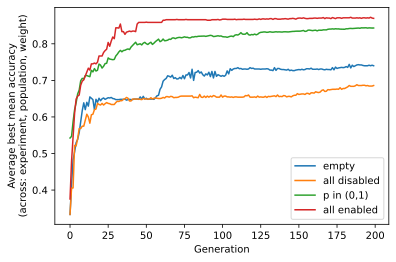

In [13]:
gen = np.arange(200)
        
for k, metrics in metric_collection.items():
    data = np.empty((len(metrics), 200))
    for i,m in enumerate(metrics):
        data[i, :] = m
    
    mean, std = np.mean(data, axis=0), np.std(data, axis=0)
    
    plt.plot(gen, mean, label=k)
    
    #q = np.quantile(data, (0.4,0.6), axis=0)
    
    #plt.fill_between(gen, q[0], q[1], alpha=0.1)
    

plt.ylabel("Average best mean accuracy\n(across: experiment, population, weight)")
plt.xlabel("Generation")
plt.legend()
plt.show()

## Other hyerparameters

In [14]:
print(series.hyperparam_table(tablefmt='grid'))

+----------------------------------------------------+--------------------------------------+
| Parameter                                          | Value                                |
+====================================================+======================================+
| Population size                                    | 100                                  |
+----------------------------------------------------+--------------------------------------+
| Number of generations                              | 200                                  |
+----------------------------------------------------+--------------------------------------+
| Initial population                                 | fully connected                      |
|                                                    | (edges have 5% chance of             |
|                                                    | being enabled)                       |
+----------------------------------------------------+------